# Linear Regression

Importing libraries

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset

In [10]:
dataset=pd.read_csv('../Datasets/Ecommerce_Customers.csv');
dataset.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


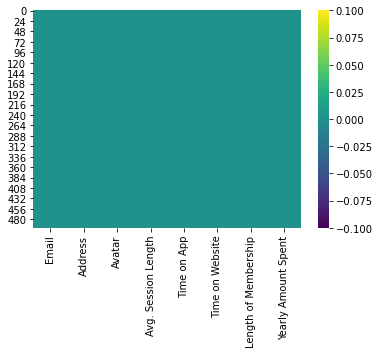

In [11]:
sns.heatmap(dataset.isnull(),cmap='viridis');

In [12]:
dataset['Time on App'].describe()

count    500.000000
mean      12.052488
std        0.994216
min        8.508152
25%       11.388153
50%       11.983231
75%       12.753850
max       15.126994
Name: Time on App, dtype: float64

<AxesSubplot:xlabel='Time on Website', ylabel='Yearly Amount Spent'>

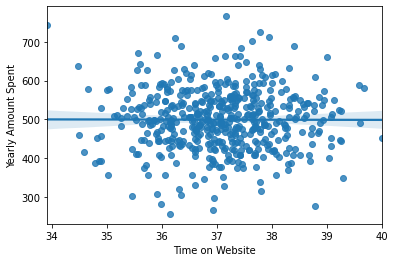

In [13]:
sns.regplot(y='Yearly Amount Spent',x='Time on Website',data=dataset)

<AxesSubplot:xlabel='Time on App', ylabel='Yearly Amount Spent'>

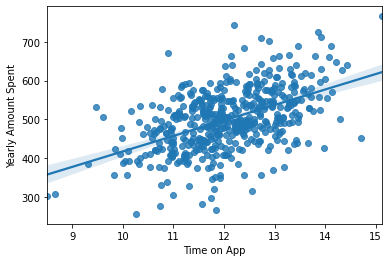

In [14]:
sns.regplot(y='Yearly Amount Spent',x='Time on App',data=dataset)

# Simple Linear Regression Between Time on App VS Yearly Amount Spent

In [15]:
X=dataset['Time on App'].values
y = dataset['Yearly Amount Spent'].values

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [17]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [18]:
X_train=X_train.reshape(-1,1)
print(X_train.shape)

print(y_train.shape)

(400, 1)
(400,)


In [19]:
X_test=X_test.reshape(-1,1)
print(X_test.shape)

print(y_test.shape)

(100, 1)
(100,)


Training

In [20]:
regressor.fit(X_train, y_train)
print("coefficient: ",regressor.coef_)
print("Intercept: ",regressor.intercept_)

coefficient:  [40.70276743]
Intercept:  9.987312325504035


Testing

In [21]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

Ploting

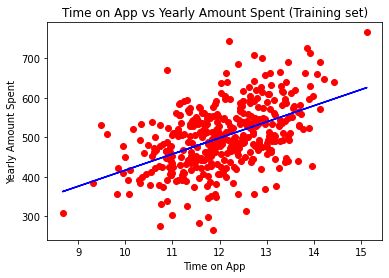

In [22]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Time on App vs Yearly Amount Spent (Training set)')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.show()


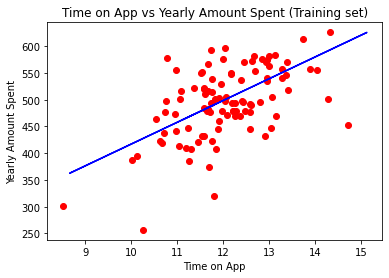

In [23]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Time on App vs Yearly Amount Spent (Training set)')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.show()

Evaluation

In [24]:
regressor.score(X_test,y_test)

0.28879418948077906

In [25]:
from sklearn.metrics import mean_squared_error
import math
import numpy as np

print("Mean absolute error: ", np.mean(np.absolute(y_pred-y_test)))
print("Mean square error: ", np.mean((y_pred-y_test)**2))
print("Root Mean square error: ",math.sqrt(np.mean((y_pred-y_test)**2)))

print(mean_squared_error(y_test,y_pred))

Mean absolute error:  44.08515574687607
Mean square error:  3149.0600464658223
Root Mean square error:  56.11648640520736
3149.0600464658223


# Multiple Linear Regression

In [26]:
X = dataset[['Time on App','Time on Website','Avg. Session Length','Length of Membership']]
y = dataset['Yearly Amount Spent'].values

timeOnApp=dataset['Time on App']

timeOnWebsite=dataset['Time on Website']

# import numpy as np
# X=np.array(X)
# y=np.array(y)

In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [29]:
#X_train=X_train.reshape(-1,1)
X_train=np.array(X_train)
X_test=np.array(X_test)
print(X_train.shape)
#y_train=y_train.reshape(-1,1)
print(y_train.shape)

(400, 4)
(400,)


In [30]:
X_train.ndim

2

Training

In [31]:
regressor.fit(X_train, y_train)
print("coefficient: ",regressor.coef_)
print("Intercept: ",regressor.intercept_)

coefficient:  [38.78534598  0.31038593 25.5962591  61.89682859]
Intercept:  -1044.257414636557


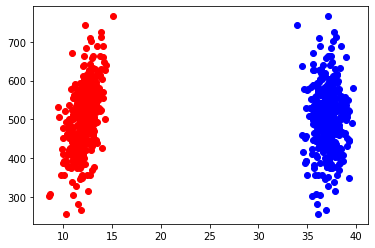

In [32]:
import matplotlib.pyplot as plt

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train[:, 0], y_train, color = 'red')
plt.scatter(X_train[:, 1], y_train, color = 'blue')

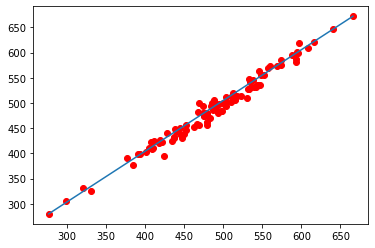

In [33]:

plt.scatter(y_test, y_pred, color = 'red')
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)])

Evaluation

In [34]:
regressor.score(X_test,y_test)

0.9778130629184125

In [35]:
import  sklearn.metrics
import math
print("Mean absolute error: ", np.mean(np.absolute(y_pred-y_test)))
print("Mean square error: ", np.mean(y_pred-y_test)**2)
print("Root Mean square error: ",math.sqrt(np.mean(y_pred-y_test)**2))

Mean absolute error:  8.558441885315245
Mean square error:  0.48770877150669817
Root Mean square error:  0.6983614905668111


# Coefficients

In [36]:
print("coefficient: ",regressor.coef_)
df=pd.DataFrame({'Time on App':[regressor.coef_[0]],'Time on Website':[regressor.coef_[1]],'Avg. Session Length':[regressor.coef_[2]],'Length of Membership':[regressor.coef_[3]]})

coefficient:  [38.78534598  0.31038593 25.5962591  61.89682859]


In [37]:
df

,Time on App,Time on Website,Avg. Session Length,Length of Membership
0,38.785346,0.310386,25.596259,61.896829
